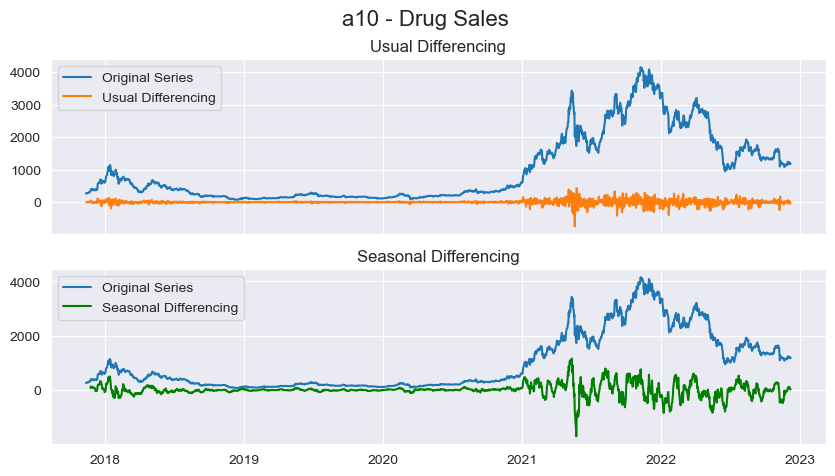

C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


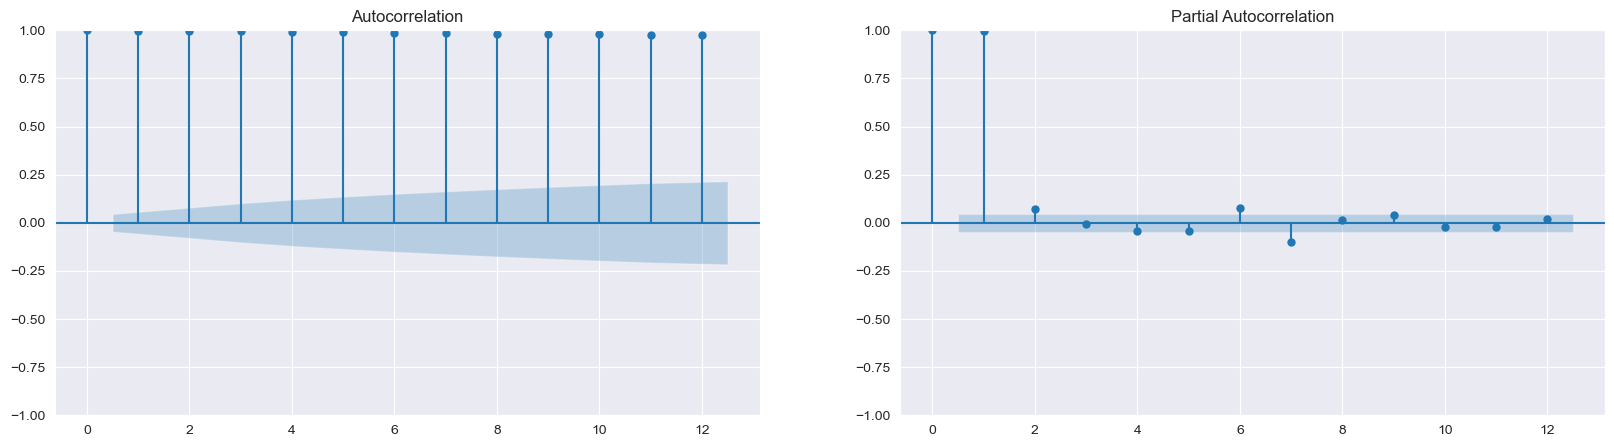

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
df = pd.read_csv('ETH-EUR_11_11_2017-07_12_2022.csv', parse_dates=['Date'], index_col='Date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.Close, label='Original Series')
axes[0].plot(df.Close.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df.Close, label='Original Series')
axes[1].plot(df.Close.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

# ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=100)
plot_acf(df.Close.tolist(), lags=12, ax=axes[0])
plot_pacf(df.Close.tolist(), lags=12, ax=axes[1])
plt.show()


C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


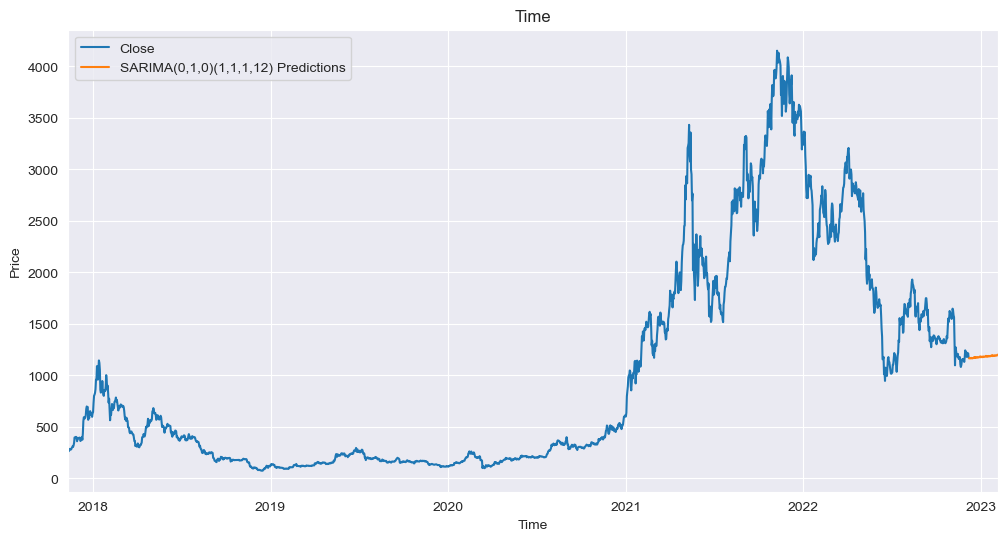

In [3]:

# Create a SARIMAX model
model = SARIMAX(df.Close, order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

# One-step ahead forecast
start=len(df.Close)
end=len(df.Close)+60
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(1,1,1,12) Predictions')

# Plot predictions against known values
title = 'Time'
ylabel='Price'
xlabel='Time'

ax = df.Close.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

# # Calculate root mean squared error
# rms = sqrt(mean_squared_error(df.Close, predictions))
# print(f'RMSE: {rms:11.10}')